In [2]:
import pandas as pd

In [8]:
final_df=pd.read_csv("processed/merged_orders_customers.csv")

C:\Users\Shravani\AppData\Local\Temp\ipykernel_1236\1770356265.py:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  final_df=pd.read_csv("processed/merged_orders_customers.csv")


In [9]:
final_df['order_purchase_timestamp'] = pd.to_datetime(final_df['order_purchase_timestamp'])

In [10]:
final_df['order_date'] = final_df['order_purchase_timestamp'].dt.date
final_df['order_month_year'] = final_df['order_purchase_timestamp'].dt.to_period('M').astype(str)

In [11]:
(final_df['total_value'] - (final_df['price'] + final_df['freight_value'])).abs().describe()

count    1.126500e+05
mean     2.109000e-15
std      9.329871e-15
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.547474e-13
dtype: float64

In [12]:
#Defining Revenue Column
final_df['revenue'] = final_df['total_value']

In [13]:
#Defining total Revenue 
total_revenue = final_df['revenue'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 15843553.24


In [14]:
#Total orders
total_orders = final_df['order_id'].nunique()
print("Total Orders:", total_orders)

Total Orders: 98666


In [15]:
#Average order value
AOV=total_revenue/total_orders
print("Average Order value:",AOV)

Average Order value: 160.57763809214927


In [16]:
#monthly sales trend
monthly_sales = final_df.groupby('order_month_year')['revenue'].sum().reset_index()
monthly_sales.columns = ['month', 'monthly_revenue']
monthly_sales

,month,monthly_revenue
0,2016-09,354.75
1,2016-10,56808.84
2,2016-12,19.62
3,2017-01,137188.49
4,2017-02,286280.62
5,2017-03,432048.59
6,2017-04,412422.24
7,2017-05,586190.95
8,2017-06,502963.04
9,2017-07,584971.62


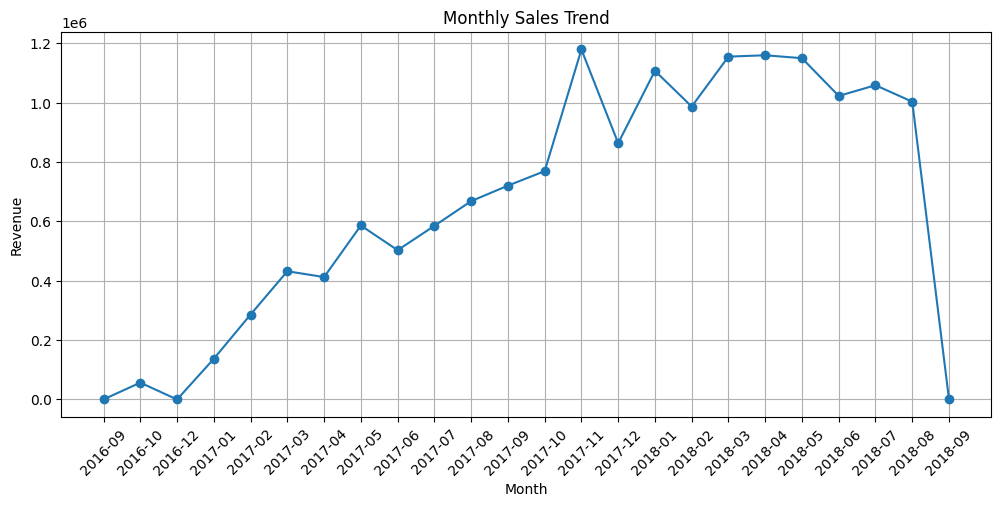

In [17]:
#line chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_sales['month'], monthly_sales['monthly_revenue'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

In [18]:
#Quarterly Sales Trend
#Created Quarter column
final_df['order_quarter'] = final_df['order_purchase_timestamp'].dt.to_period('Q').astype(str)

In [19]:
#Quarterly revenue
quarterly_sales = final_df.groupby('order_quarter')['revenue'].sum().reset_index()
quarterly_sales.columns = ['quarter', 'quarterly_revenue']
quarterly_sales

,quarter,quarterly_revenue
0,2016Q3,354.75
1,2016Q4,56828.46
2,2017Q1,855517.70
3,2017Q2,1501576.23
4,2017Q3,1973575.13
5,2017Q4,2812003.37
6,2018Q1,3249337.67
7,2018Q2,3332156.97
8,2018Q3,2062202.96


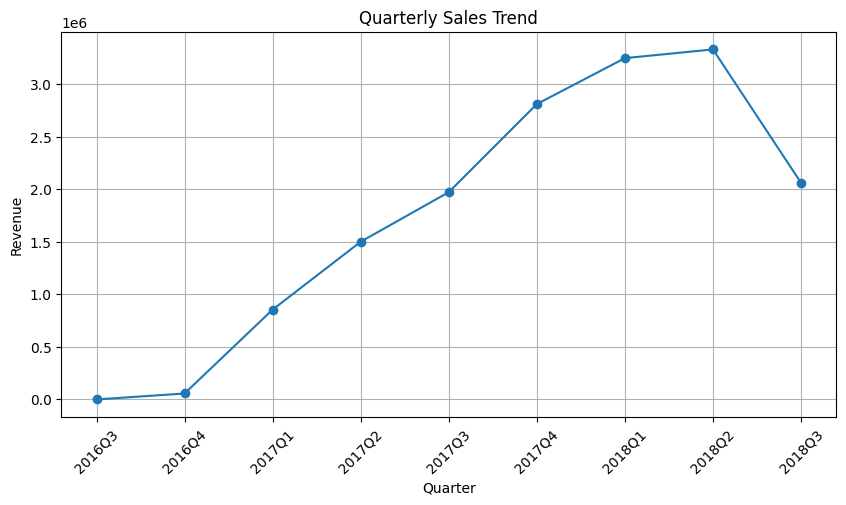

In [20]:
#Plot
plt.figure(figsize=(10,5))
plt.plot(quarterly_sales['quarter'], quarterly_sales['quarterly_revenue'], marker='o')
plt.xticks(rotation=45)
plt.title("Quarterly Sales Trend")
plt.xlabel("Quarter")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

In [21]:
#Category-wise Revenue
category_revenue = final_df.groupby('product_category_name_english')['revenue'].sum().sort_values(ascending=False).head(15)
category_revenue

product_category_name_english
bed_bath_table           1449386.81
health_beauty            1441248.07
watches_gifts            1305541.61
sports_leisure           1156656.48
computers_accessories    1059272.40
furniture_decor           902511.79
housewares                778397.77
cool_stuff                719329.95
auto                      685384.32
garden_tools              584219.21
toys                      561372.55
baby                      480118.00
perfumery                 453338.71
telephony                 394883.32
office_furniture          342532.65
Name: revenue, dtype: float64

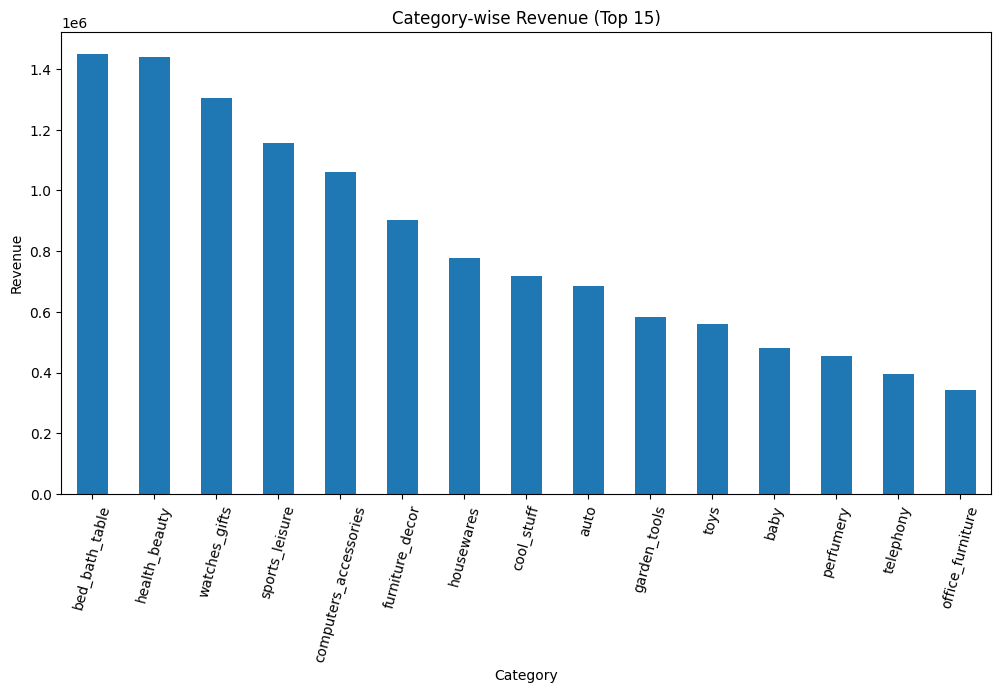

In [22]:
#bar chart
plt.figure(figsize=(12,6))
category_revenue.plot(kind='bar')
plt.title("Category-wise Revenue (Top 15)")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=75)
plt.show()

In [23]:
#Product-wise Top 10 Products (by Revenue)
top10_products = final_df.groupby('product_id')['revenue'].sum().sort_values(ascending=False).head(10)
top10_products

product_id
bb50f2e236e5eea0100680137654686c    67606.10
d1c427060a0f73f6b889a5c7c61f2ac4    60976.03
6cdd53843498f92890544667809f1595    59093.99
99a4788cb24856965c36a24e339b6058    51071.60
d6160fb7873f184099d9bc95e30376af    50326.18
3dd2a17168ec895c781a9191c1e95ad7    48212.22
aca2eb7d00ea1a7b8ebd4e68314663af    44820.76
5f504b3a1c75b73d6151be81eb05bdc9    41725.81
25c38557cf793876c5abdd5931f922db    40311.95
53b36df67ebb7c41585e8d54d6772e08    39957.93
Name: revenue, dtype: float64

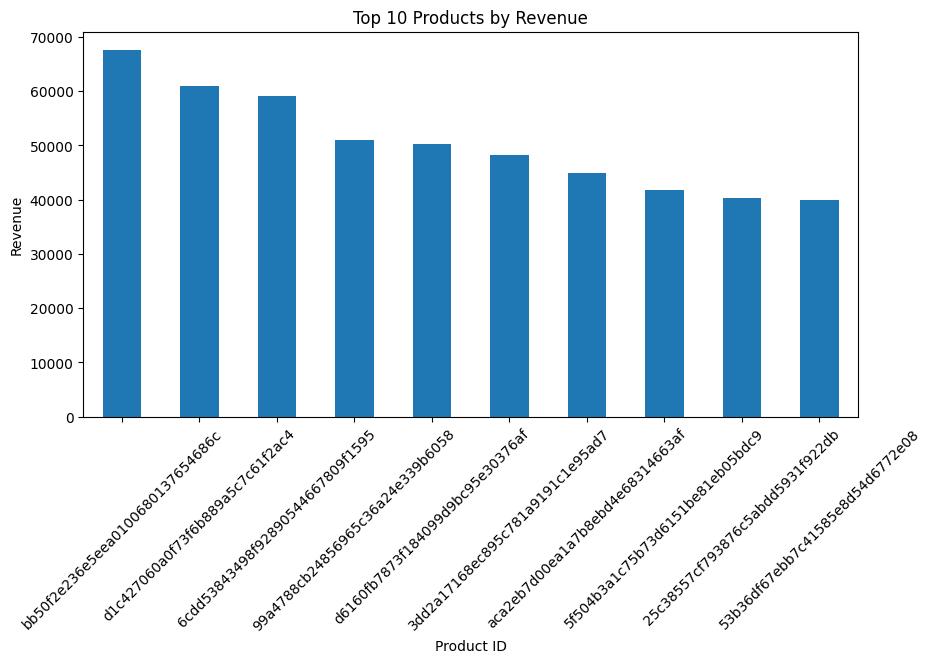

In [24]:
#bar chart
plt.figure(figsize=(10,5))
top10_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product ID")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

In [25]:
#Peak sales by Month
peak_month = final_df.groupby('order_month')['revenue'].sum().sort_values(ascending=False)
peak_month

order_month
8     1915420.28
5     1838919.88
3     1605768.65
6     1565004.24
7     1509698.92
4     1469833.60
2     1241104.31
1     1079242.42
12    1045836.66
11    1027375.70
10     817489.03
9      727859.55
Name: revenue, dtype: float64

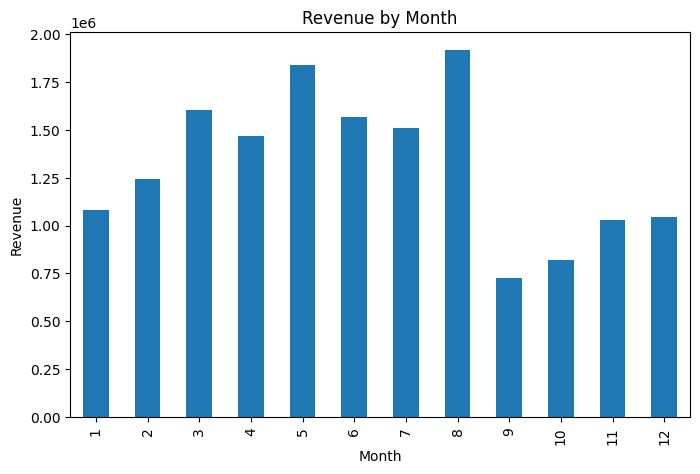

In [26]:
#plot
plt.figure(figsize=(8,5))
peak_month.sort_index().plot(kind='bar')
plt.title("Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

In [27]:
#Peak sales by Weekday
peak_weekday = final_df.groupby('order_weekday')['revenue'].sum()
peak_weekday

order_weekday
0    2879232.07
1    2793649.77
2    2906072.93
3    4309746.89
4    2470882.00
5      71771.22
6     412198.36
Name: revenue, dtype: float64

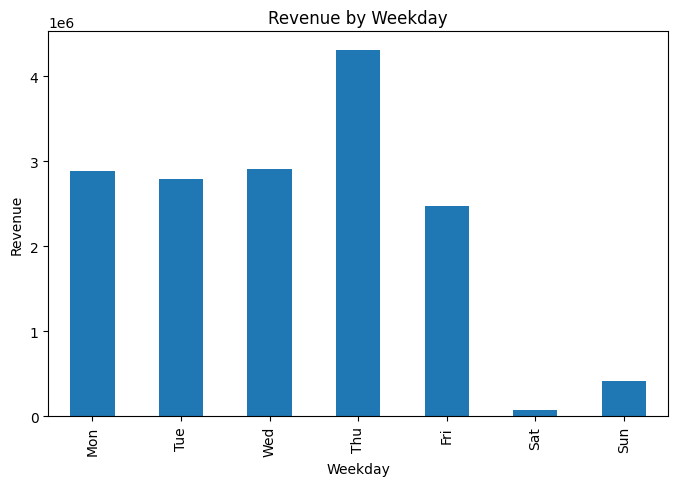

In [28]:
#plot
weekday_map = {0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}
peak_weekday_named = peak_weekday.rename(index=weekday_map)

plt.figure(figsize=(8,5))
peak_weekday_named.plot(kind='bar')
plt.title("Revenue by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Revenue")
plt.show()

In [33]:
kpi = {
    "Total Revenue": total_revenue,
    "Total Orders": total_orders,
    "Average Order Value": AOV,
    "Total Customers": final_df['customer_unique_id'].nunique()
}

kpi

{'Total Revenue': np.float64(15843553.24),
 'Total Orders': 98666,
 'Average Order Value': np.float64(160.57763809214927),
 'Total Customers': 95420}

In [34]:
kpi_df = pd.DataFrame(list(kpi.items()), columns=["Metric", "Value"])
kpi_df.to_csv("sales_revenue_analysis.csv", index=False)